<a href="https://colab.research.google.com/github/jeonuenseo/eunseo/blob/master/07_data_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

데이터 준비하기

In [ ]:
noise = 0.08

In [ ]:
X, Y = make_circles(n_samples = 1000, noise = noise)

In [ ]:
X.shape

(1000, 2)

In [ ]:
Y.shape

(1000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #보통 0.2 또


In [ ]:
X_train.shape

(800, 2)

In [ ]:
X_test.shape

(200, 2)

In [ ]:
y_test.shape

(200,)

모델 정의하고 학습하기

In [ ]:
model1 = SVC(kernel = 'rbf')

In [ ]:
%%time
model1.fit(X_train, y_train)

CPU times: user 12.8 ms, sys: 161 µs, total: 13 ms
Wall time: 14.7 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
  import matplotlib as mpl
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                      np.arange(ymin, ymax, (ymax-ymin)/1000))
  ZZ = np.reshape(model.predict(
    np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
  fig = plt.figure(figsize=(7,7))
  plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.title(title)
  plt.xlabel("x1")
  plt.ylabel("x2")

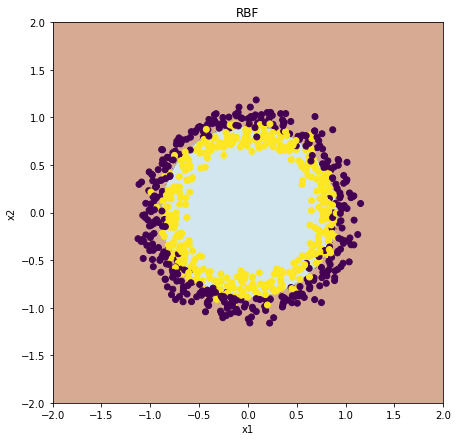

In [ ]:
PlotSVM(X_train, y_train, model1,title='RBF')

In [ ]:
'RBF{}'.format(noise)

'RBF0.08'

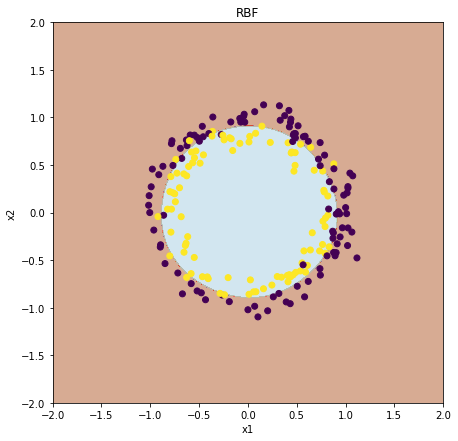

In [ ]:
PlotSVM(X_test, y_test, model1, title='RBF')

##에측하고 평가하기

In [ ]:
predictions = model1.predict(X_test)

In [ ]:
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0])

In [ ]:
y_test #사전에 잘라두었던 20%

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0])

In [ ]:
model1.score(X_test, y_test)

0.88

##confusion Matrix

In [ ]:
import pandas as pd

In [ ]:
conf_matrix = pd.crosstab(y_test, predictions)
print(conf_matrix)

col_0   0   1
row_0        
0      94  13
1      11  82


In [ ]:
y_test.shape

(200,)

In [ ]:
predictions.shape

(200,)